# Emotion and Reason in Political Language: Examining the UN General speeches
## Script 2: Descriptives
### by Sarah Franzen

### Description: 
#### -

## Descriptive Plots

In [46]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import os
import joblib
import pandas as pd
from wordcloud import WordCloud



# === Set Working Directory ===

# Set your working directory (adjust this as needed)
wd = r"C:\Users\sarah\OneDrive\Dokumente\Masterarbeit"
os.chdir(wd)

# === Define Folder Paths ===

# Make sure that you have these folders in your working directory
data_c = os.path.join(wd, 'data')
data_temp = os.path.join(data_c, 'temp')
data_freq = os.path.join(data_c, 'freq')
fig = os.path.join(wd, 'Code/0_data_preparation_descriptives/fig')

word_counts = joblib.load(os.path.join(data_freq, 'word_counts.pkl'))

df_raw = pd.read_pickle(os.path.join(data_c, "un_corpus_raw.pkl"))



In [48]:
# Create custom palette

custom_colors = ['#004260', '#50822E', '#F2A900', '#D95F02']
custom_cmap = ListedColormap(custom_colors)


### Graphs 1 &2 : Quantity of speeches by country

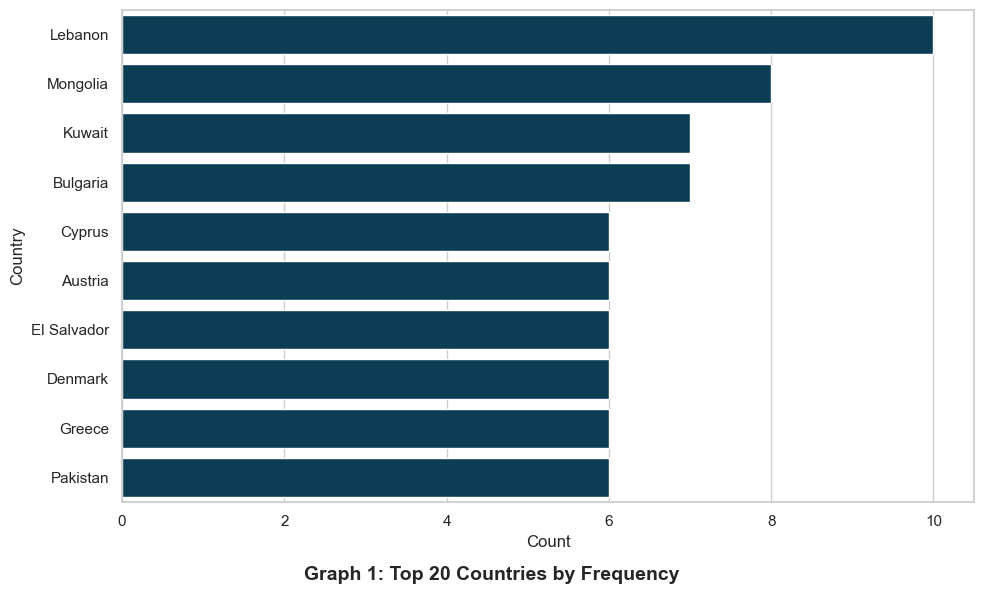

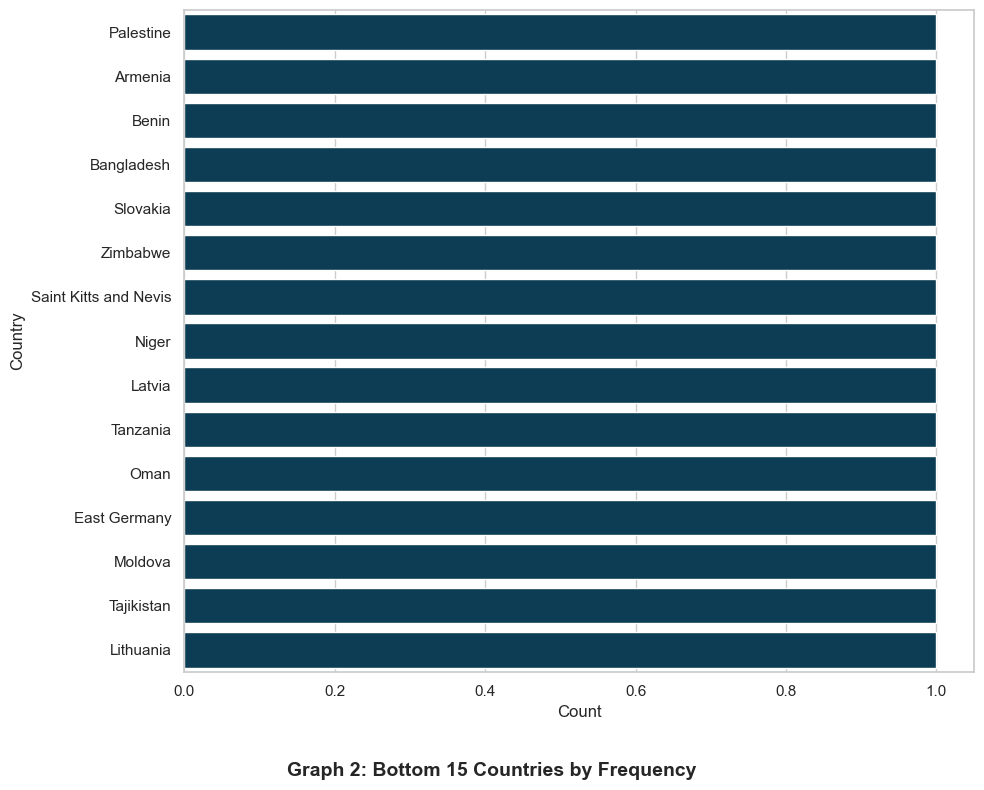

In [51]:
# Set Seaborn style
sns.set(style="whitegrid")

# Graph 1: Top 20 Countries by Frequency
top_countries = df_raw['country_name'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, color='#004260')
plt.xlabel("Count")
plt.ylabel("Country")
plt.tight_layout()
plt.subplots_adjust(bottom=0.15)  # shift everything up to make room for title
plt.figtext(0.5, 0.02, "Graph 1: Top 20 Countries by Frequency", ha="center", fontsize=14, weight='bold')
plt.show()

# Graph 2: Bottom 15 Countries by Frequency
bottom_countries = df_raw['country_name'].value_counts().nsmallest(15)
bottom_countries = bottom_countries.sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=bottom_countries.values, y=bottom_countries.index, color='#004260')
plt.xlabel("Count")
plt.ylabel("Country")
plt.tight_layout()
plt.subplots_adjust(bottom=0.15)
plt.figtext(0.5, 0.02, "Graph 2: Bottom 15 Countries by Frequency", ha="center", fontsize=14, weight='bold')
plt.show()

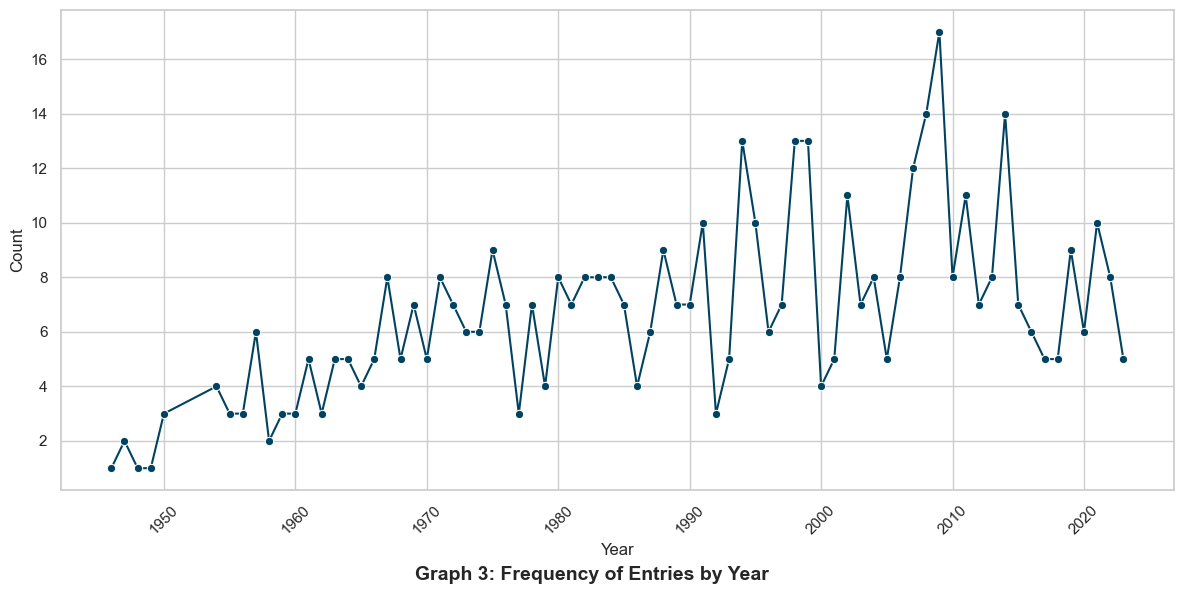

In [53]:
# == Graph 3: Quantity of speeches by year ==
year_counts = df_raw['year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o', color='#004260')
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.subplots_adjust(bottom=0.17)
plt.figtext(0.5, 0.02, "Graph 3: Frequency of Entries by Year", ha="center", fontsize=14, weight='bold')
plt.show()

### Wordcloud with the most common words

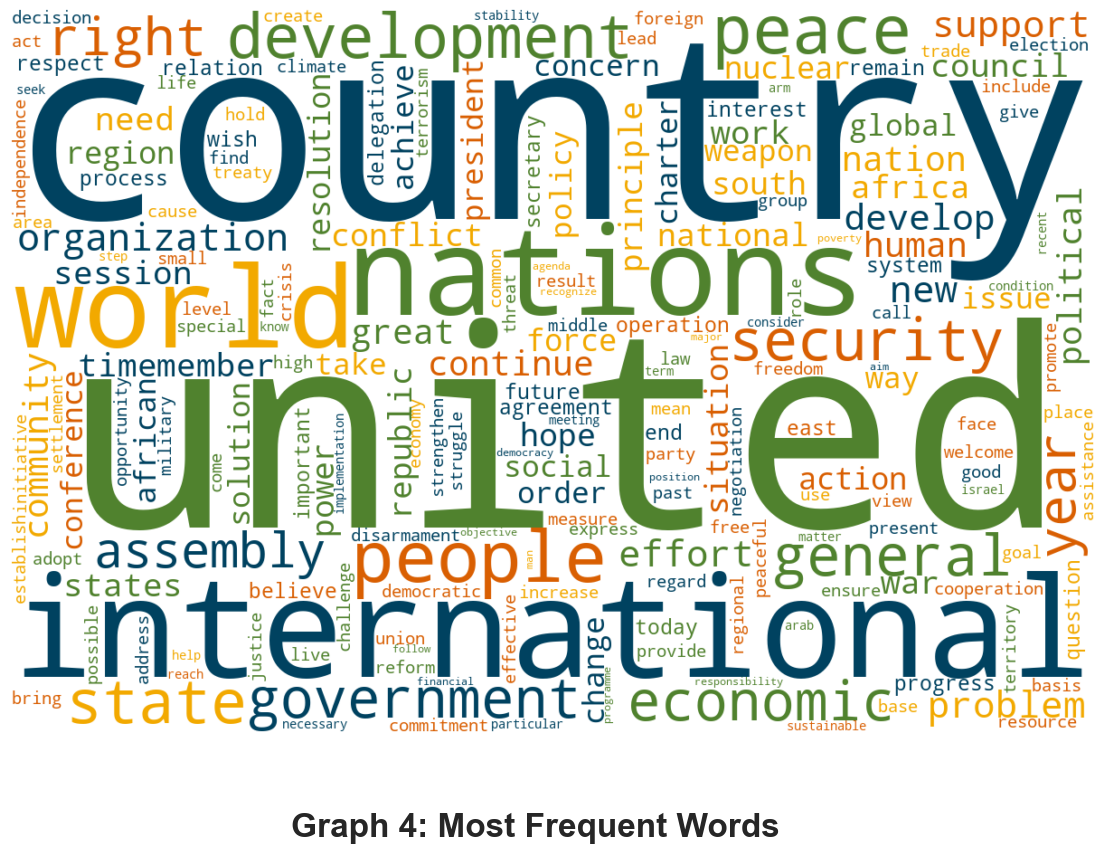

In [56]:
# == Graph 4: Most Frequent Words ==

wordcloud = WordCloud(
    width=1200,
    height=800,
    background_color='white',
    colormap=custom_cmap,  
    max_words=200,
    contour_color='steelblue',
    contour_width=2,
).generate_from_frequencies(word_counts)

# Display word cloud
plt.figure(figsize=(14, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Move title to bottom and enlarge it
plt.subplots_adjust(bottom=0.15)  # Create space at bottom
plt.figtext(0.5, 0.05, "Graph 4: Most Frequent Words", ha="center", fontsize=24, weight='bold')

plt.show()